In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sb
import matplotlib.pyplot as mtpl
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error


In [2]:
df1=pd.read_csv('listings.csv')
df2=pd.read_csv('reviews.csv')
df3=pd.read_csv('calendar.csv')

In [3]:
df1.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3818 non-null   int64  
 1   listing_url                       3818 non-null   object 
 2   scrape_id                         3818 non-null   int64  
 3   last_scraped                      3818 non-null   object 
 4   name                              3818 non-null   object 
 5   summary                           3641 non-null   object 
 6   space                             3249 non-null   object 
 7   description                       3818 non-null   object 
 8   experiences_offered               3818 non-null   object 
 9   neighborhood_overview             2786 non-null   object 
 10  notes                             2212 non-null   object 
 11  transit                           2884 non-null   object 
 12  thumbn

## Question 1: Does the higher rental price implies the better guest rating? 

In [15]:
# I see that the weekly price and the monthly prices are in object, we need them to be in float
df1['weekly_price'] = df1.weekly_price.replace('$', '')
df1['weekly_price'] = df1.weekly_price.replace(',', '').astype(float)
df1['monthly_price'] = df1.monthly_price.str.replace('$', '')
df1['monthly_price'] = df1.monthly_price.str.replace(',', '').astype(float)


In [24]:
# clean df 1
# fill the empty weekly price 
columnsWithNa1 = ['weekly_price']
for column in columnsWithNa1:
    df1[column].fillna(df1['monthly_price']/4.2, inplace = True)
#fill the empty monthly prices with 4.2 times the weekly price
columnsWithNa2 = ['monthly_price']
for column in columnsWithNa2:
    df1[column].fillna(df1['weekly_price']*4.2, inplace = True)

(array([ 10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100., 110.]),
 <a list of 11 Text major ticklabel objects>)

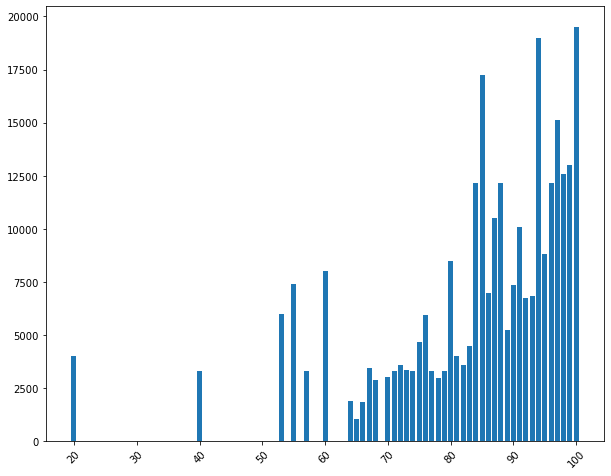

In [27]:
mtpl.figure(figsize = (10,8))
mtpl.bar(x = df1['review_scores_rating'],height = df1['monthly_price'])
mtpl.xticks(rotation = 45)

(array([ 10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100., 110.]),
 <a list of 11 Text major ticklabel objects>)

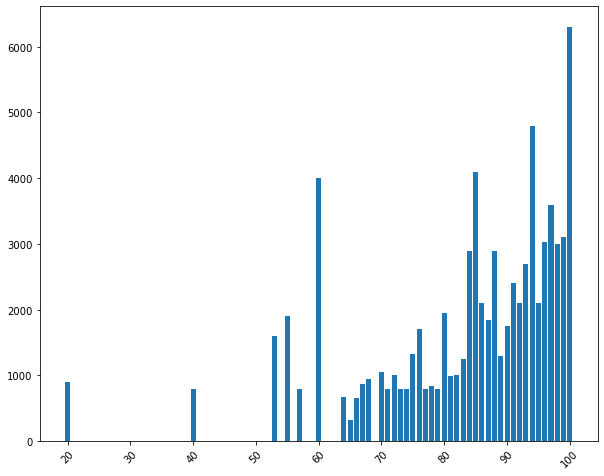

In [28]:
mtpl.figure(figsize = (10,8))
mtpl.bar(x = df1['review_scores_rating'],height = df1['weekly_price'])
mtpl.xticks(rotation = 45)

In [17]:
df1.groupby(['review_scores_rating']).mean()['monthly_price'].sort_values().dropna()

review_scores_rating
65.0     1050.000000
66.0     1822.500000
64.0     1895.000000
70.0     1962.500000
78.0     2187.750000
71.0     2273.874564
68.0     2295.000000
86.0     2514.514245
73.0     2568.321055
75.0     2600.000000
74.0     2603.311847
83.0     2733.410935
82.0     2752.487108
89.0     2818.640918
91.0     2843.619728
92.0     2846.855192
77.0     2853.717770
95.0     2870.990651
90.0     2909.469378
80.0     2909.538080
97.0     2921.469938
93.0     2966.838434
72.0     2996.655923
87.0     3014.920722
98.0     3046.582213
94.0     3048.493651
96.0     3098.641115
60.0     3135.541231
99.0     3158.896597
67.0     3195.000000
88.0     3201.698940
84.0     3210.157097
100.0    3233.535431
79.0     3311.623693
57.0     3311.623693
40.0     3311.623693
81.0     3330.000000
85.0     3348.635859
76.0     3471.324739
20.0     4000.000000
53.0     5990.000000
55.0     7400.000000
Name: monthly_price, dtype: float64

##  In here, we see that the ratings has a positive relation with the monthly rental prices

## Question 2: Do those houses with high review score really reveals how they are doing? Can a house have high review score because only a few reviews per month?

(array([ 10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100., 110.]),
 <a list of 11 Text major ticklabel objects>)

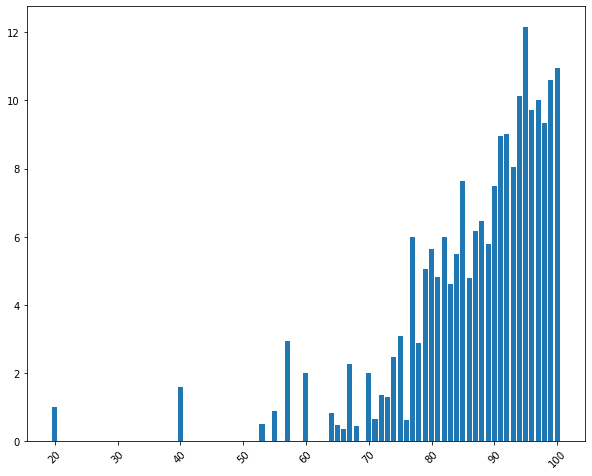

In [29]:
mtpl.figure(figsize = (10,8))
mtpl.bar(x = df1['review_scores_rating'],height = df1['reviews_per_month'])
mtpl.xticks(rotation = 45)

## From the bar graph, we can see that the houses receive a high review scores generally have more many reviews per month. We rarely a house with many low review scores or a house with small number of reviews but high review scores. I think this a result of customer rarely choose a house with low review scores. The house with high review scores will attract more customers, hence more reviews per month. 

## Question 3: Which factor(s) do the houses need to improve the most ?Which factor is the most to the review rating? 

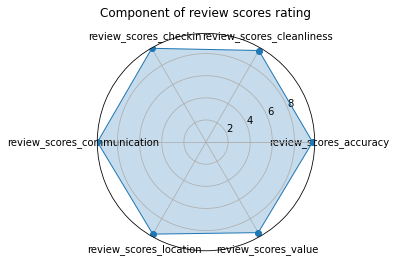

In [71]:
# Radar map for review scores rating, this writes the labels
accuracy = df1['review_scores_accuracy'].mean()
cleanliness = df1['review_scores_cleanliness'].mean()
checkin = df1['review_scores_checkin'].mean()
communication = df1['review_scores_communication'].mean()
location = df1['review_scores_location'].mean()
value = df1['review_scores_value'].mean()
#labels=np.array(['accuracy', 'cleanliness', 'checkin','communication','location', 'value'])
labels= np.array(['review_scores_accuracy','review_scores_cleanliness','review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value'])
stats=np.array([accuracy, cleanliness, checkin, communication, location, value])
# Set the agle for the radar graph, and close the graph

angles=np.linspace(0, 2*np.pi, len(labels), endpoint=False)
# close the plot
stats=np.concatenate((stats,[stats[0]]))
angles=np.concatenate((angles,[angles[0]]))
 
# Draw the graph
fig=mtpl.figure()
ax = fig.add_subplot(111, polar=True)
ax.plot(angles, stats, 'o-', linewidth=1)
ax.fill(angles, stats, alpha=0.25)
ax.set_thetagrids(angles * 180/np.pi, labels)
ax.set_title('Component of review scores rating')
ax.grid(True)


## In here we see that they do receive scores that are very close to each other let us subtract nine (their rating is above 9) from the factors and replot 

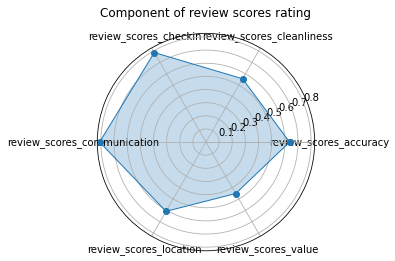

In [72]:
# Radar map for review scores rating, this writes the labels
accuracy = df1['review_scores_accuracy'].mean()-9
cleanliness = df1['review_scores_cleanliness'].mean()-9
checkin = df1['review_scores_checkin'].mean()-9
communication = df1['review_scores_communication'].mean()-9
location = df1['review_scores_location'].mean()-9
value = df1['review_scores_value'].mean()-9
#labels=np.array(['accuracy', 'cleanliness', 'checkin','communication','location', 'value'])
labels= np.array(['review_scores_accuracy','review_scores_cleanliness','review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value'])
stats=np.array([accuracy, cleanliness, checkin, communication, location, value])
# Set the agle for the radar graph, and close the graph

angles=np.linspace(0, 2*np.pi, len(labels), endpoint=False)
# close the plot
stats=np.concatenate((stats,[stats[0]]))
angles=np.concatenate((angles,[angles[0]]))
 
# Draw the graph
fig=mtpl.figure()
ax = fig.add_subplot(111, polar=True)
ax.plot(angles, stats, 'o-', linewidth=1)
ax.fill(angles, stats, alpha=0.25)
ax.set_thetagrids(angles * 180/np.pi, labels)
ax.set_title('Component of review scores rating')
ax.grid(True)

## In here we see that the review scores value receive the least score, so this is the factor that need to be improved for all the availble houses. We see that communication receives the highest score. The customer, indeed value that the most 